In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder

In [4]:
data = pd.read_csv('Used_Bikes.csv')
data.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [5]:
datanew = pd.get_dummies(data = data,drop_first = True)

In [6]:
datanew.head()

,price,kms_driven,age,power,bike_name_BMW G 310 GS,bike_name_BMW G 310 R,bike_name_BMW S 1000 RR Pro,bike_name_BMW S 1000 XR Pro,bike_name_Bajaj Pulsar 180cc,bike_name_Bajaj Avenger 150cc,bike_name_Bajaj Avenger 180cc,bike_name_Bajaj Avenger 200cc,bike_name_Bajaj Avenger 220cc,bike_name_Bajaj Avenger Cruise 220,bike_name_Bajaj Avenger Cruise 220 ABS,bike_name_Bajaj Avenger Street 150,bike_name_Bajaj Avenger Street 160 ABS,bike_name_Bajaj Avenger Street 180,bike_name_Bajaj Avenger Street 220,bike_name_Bajaj Avenger Street 220 ABS,bike_name_Bajaj Boxer AT100,bike_name_Bajaj Boxer BM150,bike_name_Bajaj Boxer CT100,bike_name_Bajaj CT 100 100cc,bike_name_Bajaj CT 100 Alloy,bike_name_Bajaj CT 100 B,bike_name_Bajaj CT 100 ES Alloy,bike_name_Bajaj CT 100 KS Alloy,bike_name_Bajaj CT 100 Spoke,bike_name_Bajaj CT110 ES Alloy,bike_name_Bajaj Discover 100M,bike_name_Bajaj Discover 100T,bike_name_Bajaj Discover 100cc,bike_name_Bajaj Discover 110cc,bike_name_Bajaj Discover 125M,bike_name_Bajaj Discover 125ST,bike_name_Bajaj Discover 125T,bike_name_Bajaj Discover 125cc,bike_name_Bajaj Discover 125cc Disc,bike_name_Bajaj Discover 135cc,...,city_Vasai,city_Vastral,city_Vellore,city_Vidisha,city_Vijayawada,city_Viramgam,city_Virar,city_Virudhunagar,city_Visakhapatnam,city_Vizianagaram,city_Warangal,city_Wardha,city_Yamuna Nagar,city_Yemmiganur,city_Zirakpur,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner,brand_Bajaj,brand_Benelli,brand_Ducati,brand_Harley-Davidson,brand_Hero,brand_Honda,brand_Hyosung,brand_Ideal,brand_Indian,brand_Jawa,brand_KTM,brand_Kawasaki,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,35000.0,17654.0,3.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,119900.0,11000.0,4.0,350.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,600000.0,110.0,8.0,675.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,65000.0,16329.0,4.0,180.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,80000.0,10000.0,3.0,150.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [7]:
y = datanew['price']
X = datanew.drop(['price'],axis = 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [11]:
print('mean_squared_error   : ',mean_squared_error(y_test,tree.predict(X_test)))
print('mean_absolute_error  : ',mean_absolute_error(y_test,tree.predict(X_test)))

mean_squared_error   :  518631087.5777267
mean_absolute_error  :  2968.9269525267996


In [20]:
forest = RandomForestRegressor(n_estimators=300,min_samples_split=2)
forest.fit(X_train,y_train)

print('mean_squared_error   : ',mean_squared_error(y_test,forest.predict(X_test)))
print('mean_absolute_error  : ',mean_absolute_error(y_test,forest.predict(X_test)))

mean_squared_error   :  582160309.7797765
mean_absolute_error  :  3136.9856140811607


In [23]:
def MAPE(X,y):
  mape = []
  for i,j in zip(y,X):
    mape.append(abs((i-j)/i))

  return (sum(mape)/len(mape))*100

print('DT mape : ',MAPE(tree.predict(X_test),y_test))
print('RF mape : ',MAPE(forest.predict(X_test),y_test))

DT mape :  3.5514226779261824
RF mape :  3.3610057053874245


In [15]:
D = {}
for i,j in zip(forest.feature_importances_,X.columns):
  D[j] = i

print(D) 

{'kms_driven': 0.012942077265309606, 'age': 0.0420197726498873, 'power': 0.8693070771704822, 'bike_name_BMW G 310 GS': 7.73854254231241e-05, 'bike_name_BMW G 310 R': 0.00021150766010703757, 'bike_name_BMW S 1000 RR Pro': 0.0045512069192639925, 'bike_name_BMW S 1000 XR Pro': 0.0026384416609333333, 'bike_name_Bajaj  Pulsar 180cc': 4.596543018718292e-07, 'bike_name_Bajaj Avenger 150cc': 0.0, 'bike_name_Bajaj Avenger 180cc': 1.2580112281852441e-06, 'bike_name_Bajaj Avenger 200cc': 3.9367446203480476e-08, 'bike_name_Bajaj Avenger 220cc': 5.189943727291097e-06, 'bike_name_Bajaj Avenger Cruise 220': 7.428280665906806e-06, 'bike_name_Bajaj Avenger Cruise 220 ABS': 0.0, 'bike_name_Bajaj Avenger Street 150': 5.109590578480383e-06, 'bike_name_Bajaj Avenger Street 160 ABS': 0.0, 'bike_name_Bajaj Avenger Street 180': 1.0583094323673307e-06, 'bike_name_Bajaj Avenger Street 220': 1.5142161224835117e-06, 'bike_name_Bajaj Avenger Street 220 ABS': 0.0, 'bike_name_Bajaj Boxer AT100': 0.0, 'bike_name_Baja

<BarContainer object of 10 artists>

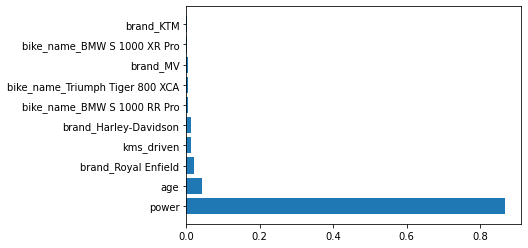

In [16]:
Dc = Counter(D)
plt.barh(y = [i[0] for i in Dc.most_common(10)], width = [j[1] for j in Dc.most_common(10)])
# plt.xticks(range(10), [i[0] for i in Dc.most_common(10)])